In [33]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

In [3]:
given_images = pd.read_csv('train_digitalRecogniser.csv')
given_images.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
images = given_images.iloc[0:,1:]
images.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


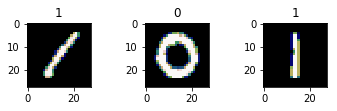

In [139]:
images= images.reshape(images.shape[0], 28, 28)
for i in range(0, 3):
    
    plt.subplot(330 + (i+1))
    plt.imshow(images[i], cmap=plt.get_cmap('gist_earth'))
    plt.title(labels[i])
    


In [127]:
labels = given_images.iloc[0:,0]
labels.tail()

41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, dtype: int64

In [12]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size = 0.75, test_size = 0.25, random_state= 1)

In [13]:
test_images_final = test_images[test_images > 0]
test_images_final.fillna(1, inplace = True)


train_images_final = train_images[test_images > 0]
train_images_final.fillna(1, inplace = True)
train_images_final.head()



#test_images[test_images>0]=1


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
25138,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
40867,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
17205,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3450,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1491,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [41]:
#clf = svm.SVC()
clf = RandomForestClassifier()
#clf = DecisionTreeClassifier()
clf.fit(train_images, train_labels)
label_pred = clf.predict(test_images)

In [42]:
accuracy = accuracy_score(test_labels, label_pred)
print(accuracy)

0.9385714285714286


In [77]:
df1 = pd.read_csv('test_digitalRecogniser.csv')
df1
result = clf.predict(df1)
df = pd.DataFrame(result)
df.index.name ='ImageId'
df.index+=1
df.columns = ['Label']
df.to_csv('results_digital recogniser.csv' , header = True)

df.head()
#df.shape

,Label
ImageId,
1,2
2,0
3,9
4,4
5,2
